# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16 - Takes a long time to train
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *
from efficientNet import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [3]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    
    # Rotate the images randomly (just to make it as independent from the position of the pipeline)
    transforms.RandomRotation(180),

    # Random crop
    transforms.RandomCrop(140),

    #Random horizontal flip
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor(),

    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [4]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()


loss_fn = nn.CrossEntropyLoss()

In [7]:
#Train ResNet18
resnet18.to(device)
radam_optim = torch.optim.RAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=radam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5115 | train_acc: 0.7638 | validation_loss: 0.8295 | validation_acc: 0.6348
Epoch: 2 | train_loss: 0.5194 | train_acc: 0.7658 | validation_loss: 0.5726 | validation_acc: 0.7633
Epoch: 3 | train_loss: 0.4769 | train_acc: 0.7810 | validation_loss: 1.1383 | validation_acc: 0.6250
Epoch: 4 | train_loss: 0.4768 | train_acc: 0.7778 | validation_loss: 0.6603 | validation_acc: 0.6871
Epoch: 5 | train_loss: 0.4504 | train_acc: 0.7987 | validation_loss: 1.1476 | validation_acc: 0.6422
Epoch: 6 | train_loss: 0.4639 | train_acc: 0.7920 | validation_loss: 0.5775 | validation_acc: 0.7672
Epoch: 7 | train_loss: 0.4053 | train_acc: 0.8175 | validation_loss: 0.6889 | validation_acc: 0.7328
Epoch: 8 | train_loss: 0.4046 | train_acc: 0.8105 | validation_loss: 0.5476 | validation_acc: 0.7887
Epoch: 9 | train_loss: 0.4043 | train_acc: 0.8135 | validation_loss: 1.0342 | validation_acc: 0.6102
Epoch: 10 | train_loss: 0.4205 | train_acc: 0.8143 | validation_loss: 0.6459 | validation_a

In [8]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [9]:
#Train ResNet50
resnet50.to(device)
radam_optim = torch.optim.RAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=radam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8989 | train_acc: 0.6015 | validation_loss: 0.6881 | validation_acc: 0.6355
Epoch: 2 | train_loss: 0.6341 | train_acc: 0.7218 | validation_loss: 0.9541 | validation_acc: 0.5535
Epoch: 3 | train_loss: 0.5820 | train_acc: 0.7402 | validation_loss: 0.9970 | validation_acc: 0.6039
Epoch: 4 | train_loss: 0.5017 | train_acc: 0.7725 | validation_loss: 0.7500 | validation_acc: 0.6371
Epoch: 5 | train_loss: 0.4846 | train_acc: 0.7810 | validation_loss: 1.4462 | validation_acc: 0.5824
Epoch: 6 | train_loss: 0.4799 | train_acc: 0.7933 | validation_loss: 2.9482 | validation_acc: 0.5402
Epoch: 7 | train_loss: 0.4620 | train_acc: 0.8015 | validation_loss: 6.6749 | validation_acc: 0.3574
Epoch: 8 | train_loss: 0.5495 | train_acc: 0.7555 | validation_loss: 2.5545 | validation_acc: 0.5391
Epoch: 9 | train_loss: 0.4602 | train_acc: 0.7973 | validation_loss: 0.4507 | validation_acc: 0.8074
Epoch: 10 | train_loss: 0.4156 | train_acc: 0.8050 | validation_loss: 0.4477 | validation_a

In [10]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [11]:
#Train MobileNet Large
mobnet_lrg.to(device)
radam_optim = torch.optim.RAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=radam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0265 | train_acc: 0.5255 | validation_loss: 0.6866 | validation_acc: 0.6937
Epoch: 2 | train_loss: 0.6884 | train_acc: 0.6837 | validation_loss: 0.6658 | validation_acc: 0.6820
Epoch: 3 | train_loss: 0.5945 | train_acc: 0.7258 | validation_loss: 0.7767 | validation_acc: 0.6582
Epoch: 4 | train_loss: 0.5806 | train_acc: 0.7352 | validation_loss: 0.6057 | validation_acc: 0.7180
Epoch: 5 | train_loss: 0.5348 | train_acc: 0.7500 | validation_loss: 0.5443 | validation_acc: 0.7344
Epoch: 6 | train_loss: 0.5177 | train_acc: 0.7628 | validation_loss: 0.5900 | validation_acc: 0.7613
Epoch: 7 | train_loss: 0.4792 | train_acc: 0.7900 | validation_loss: 0.5566 | validation_acc: 0.7871
Epoch: 8 | train_loss: 0.5182 | train_acc: 0.7688 | validation_loss: 0.5395 | validation_acc: 0.7578
Epoch: 9 | train_loss: 0.4590 | train_acc: 0.7900 | validation_loss: 0.6328 | validation_acc: 0.7445
Epoch: 10 | train_loss: 0.4673 | train_acc: 0.7835 | validation_loss: 0.5877 | validation_a

In [12]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

In [13]:
#Train MobileNet Small
mobnet_sml.to(device)
radam_optim = torch.optim.RAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=radam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2135 | train_acc: 0.4335 | validation_loss: 0.7668 | validation_acc: 0.6461
Epoch: 2 | train_loss: 0.7057 | train_acc: 0.6653 | validation_loss: 0.6334 | validation_acc: 0.6969
Epoch: 3 | train_loss: 0.6202 | train_acc: 0.7005 | validation_loss: 0.7510 | validation_acc: 0.6480
Epoch: 4 | train_loss: 0.5837 | train_acc: 0.7325 | validation_loss: 0.7129 | validation_acc: 0.7016
Epoch: 5 | train_loss: 0.5122 | train_acc: 0.7632 | validation_loss: 0.6710 | validation_acc: 0.6914
Epoch: 6 | train_loss: 0.4997 | train_acc: 0.7648 | validation_loss: 0.6563 | validation_acc: 0.7188
Epoch: 7 | train_loss: 0.4920 | train_acc: 0.7718 | validation_loss: 0.5459 | validation_acc: 0.7633
Epoch: 8 | train_loss: 0.5558 | train_acc: 0.7585 | validation_loss: 0.6347 | validation_acc: 0.7180
Epoch: 9 | train_loss: 0.4968 | train_acc: 0.7782 | validation_loss: 0.5255 | validation_acc: 0.7906
Epoch: 10 | train_loss: 0.4373 | train_acc: 0.7985 | validation_loss: 0.6837 | validation_a

In [14]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

In [13]:
#Train EfficientNetV3 B0
# effnetb0.to(device)
# rprop_optim = torch.optim.Rprop(params=effnetb0.parameters(), lr=lr)
# train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

In [14]:
#eval_effnetb0_results = eval_model(effnetb0, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

In [15]:
#Train EfficientNetV3 B5
#effnetb5.to(device)
#rprop_optim = torch.optim.Rprop(params=effnetb5.parameters(), lr=lr)
#train_effnetb5_results, train_time_effnetb5 = train(effnetb5, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

In [16]:
#eval_effnetb5_results = eval_model(effnetb5, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

(None, None)

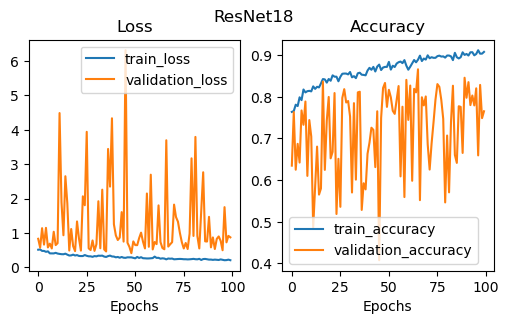

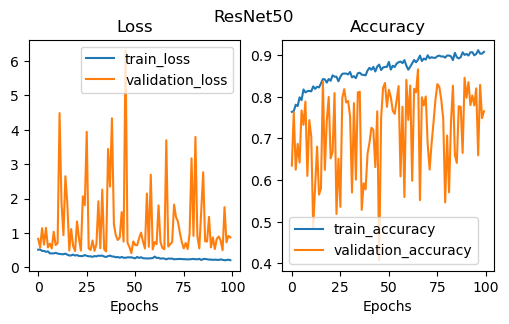

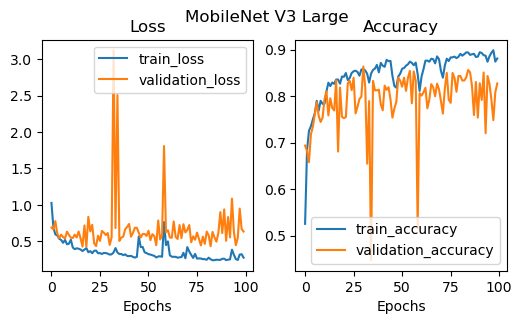

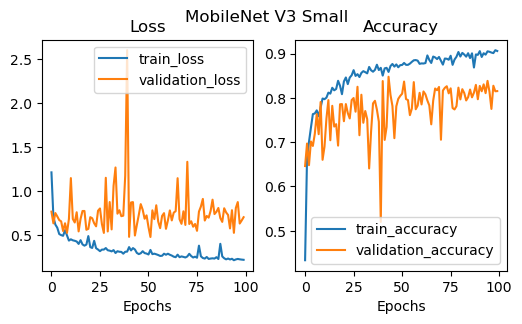

In [15]:
plot_loss_curves(train_resnet18_results,"ResNet18"), plot_loss_curves(train_resnet18_results,"ResNet50"),
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large"), plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small")
#plot_loss_curves(train_effnetb0_results,"EfficientNet B0"), plot_loss_curves(train_effnetb5_results,"EfficientNet B5"),

(None, None)

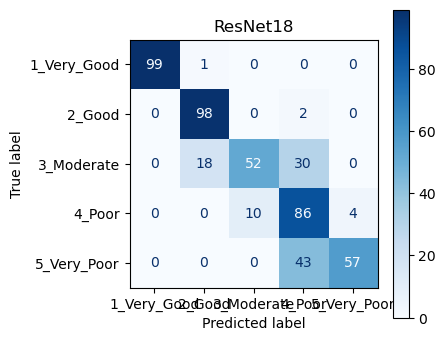

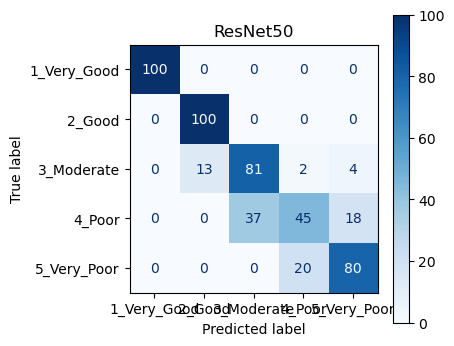

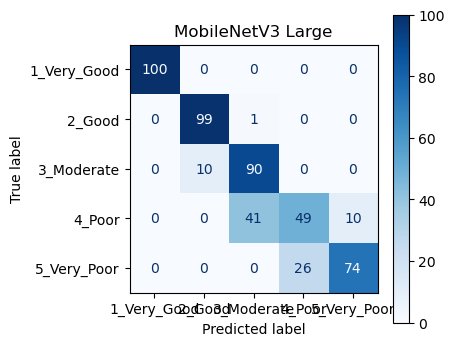

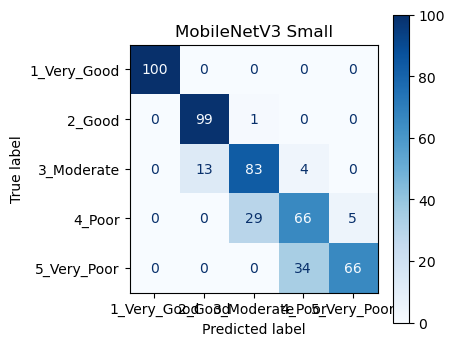

In [16]:
plot_confusion_matrix(resnet18,test_dl,device,class_names, "ResNet18"), plot_confusion_matrix(resnet50, test_dl, device, class_names, "ResNet50"),
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names, "MobileNetV3 Large"), plot_confusion_matrix(mobnet_sml, test_dl, device, class_names, "MobileNetV3 Small")
#plot_confusion_matrix(effnetb0,test_dl,device,class_names, "EfficientNet B0"), plot_confusion_matrix(effnetb5, test_dl, device, class_names, "EfficientNet B5")


In [17]:
all_results = pd.DataFrame([
    eval_resnet18_results,
    eval_resnet50_results,
    eval_mobnet_sml_results,
    eval_mobnet_lrg_results,
    #eval_effnetb0_results,
    #eval_effnetb5_results
    ])

In [18]:
all_results['train_time'] = pd.DataFrame([
    train_time_resnet18,
    train_time_resnet50,
    train_time_mobnet_lrg,
    train_time_mobnet_sml,
    #train_time_effnetb0,
    #train_time_effnetb5
])

In [19]:
all_results

,model_name,model_loss,model_acc,model_inf_time,train_time
0,ResNet,0.886540,77.578125,27.580800,8510.321249
1,ResNet,0.626338,80.820312,86.450624,8110.253450
2,MobileNetV3,0.744056,81.406250,19.053310,7530.859004
3,MobileNetV3,0.665495,83.125000,28.001216,7301.150316


In [22]:
model_name_resnet18 = 'ResNet18_1000_class_100_epoch.pth'
model_name_resnet50 = 'ResNet50_1000_class_100_epoch.pth'
model_name_mobnet_lrg = 'Mobnet_lrg_1000_class_100_epoch.pth'
model_name_mobnet_sml = 'Mobnet_sml_1000_class_100_epoch.pth'
model_name_effnetb0 = 'EffNet_B0_1000_class_100_epoch.pth'
model_name_effnetb5 = 'EffNet_B5_1000_class_100_epoch.pth'

save_model(models_path, model_name_resnet18, resnet18)
save_model(models_path, model_name_resnet50, resnet50)
save_model(models_path, model_name_mobnet_lrg, mobnet_lrg)
save_model(models_path, model_name_mobnet_sml, mobnet_sml)
#save_model(models_path, model_name_effnetb0, effnetb0)
#save_model(models_path, model_name_effnetb5, effnetb5)

resnet18_all_results = [eval_resnet18_results, train_resnet18_results, train_time_resnet18]
resnet50_all_results = [eval_resnet50_results, train_resnet50_results, train_time_resnet50]
mobnet_lrg_all_results = [eval_mobnet_lrg_results, train_mobnet_lrg_results, train_time_mobnet_lrg]
mobnet_sml_all_results = [eval_mobnet_sml_results, train_mobnet_sml_results, train_time_mobnet_sml]
#effnetb0_all_results = [eval_effnetb0_results, train_effnetb0_results, train_time_effnetb0]
#effnetb5_all_results = [eval_effnetb5_results, train_effnetb5_results, train_time_effnetb5]

name_results_resnet18 = 'resnet18_results.npy'
name_results_resnet50 = 'resnet50_results.npy'
name_results_mobnet_lrg = 'mobnet_lrg_results.npy'
name_results_mobnet_sml = 'mobnet_sml_results.npy'
name_results_effnetb0 = 'effnetb0_results.npy'
name_results_effnetb5 = 'effnetb5_results.npy'

pth = saves / name_results_resnet18
np.save(pth,resnet18_all_results)

pth = saves / name_results_resnet50
np.save(pth,resnet50_all_results)

pth = saves / name_results_mobnet_lrg
np.save(pth,mobnet_lrg_all_results )

pth = saves / name_results_mobnet_sml
np.save(pth,mobnet_sml_all_results)

# pth = saves / name_results_effnetb0
# np.save(pth,effnetb0_all_results )

# pth = saves / name_results_effnetb5
# np.save(pth,effnetb5_all_results )

Saving the model to: Models\ResNet18_1000_class_100_epoch.pth
Saving the model to: Models\ResNet50_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_lrg_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_sml_1000_class_100_epoch.pth
